# CIFAR embedding through sklearn#

Simple program to check how the different algorithms available through sklearn do at classifing images of cats and dogs. As expected, the problem is not simple enough for this programs to work. To be able to distinguish between the two, a more complex routine will be needed.

In [1]:
import math
import os
from matplotlib import pyplot as plt
import numpy as np
from six.moves import cPickle 
import matplotlib.pyplot as plt
from sklearn import manifold

# General parameters for classification
n_neighbors = 30
n_components = 2

A little function for plotting

In [2]:
def plotting(X, Y):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(X[:, 0],X[:, 1], c='b', label='Cats')
    ax1.scatter(Y[:, 0], Y[:, 1], c='r', label='Dogs')
    plt.legend(loc='upper left');
    
    return plt.show()

Let's use Patrick's program to load the CIFAR images

In [3]:
"""IMPORTANT: The data array contains 3072 bytes, where the first 1024 are for
red, the next green and the last blue.
"""
class loader():
    def __init__(self, path, **kwargs):
        f = open(path, 'rb')
        datadict = cPickle.load(f,encoding='latin1')
        f.close()
        X = datadict["data"]
        #print(X) 
        Y = datadict['labels']
        #X = X.reshape(10000,3, 32, 32).astype("float")
        self.X = X
        Y_Neuron = Y
        Y = np.array(Y)

        #------------------------------------------------------------------
        #Separate Cats and Dogs, get indices of the animals
        cat_label = 3 #cifar labels cat with 3
        cat_indices = []

        for i in range(0,len(Y)):
            if Y[i] == cat_label:
                cat_indices.append(i)
                
        dog_label = 5 #cifar labels dog with 5
        dog_indices = []

        for i in range(0,len(Y)):
            if Y[i] == dog_label:
                dog_indices.append(i)

        #make lists of cat and dog images
        #and list of the labels
        #to be able to generalize to other cifar images I relabel 3 --> [0,0,0,1,0,0...]
        #and 5 to [0,0,0,0,0,1,0..]
        self.cats = []
        self.dogs = []
        self.cats_label = []
        self.dogs_label = []
        for i in cat_indices:
            self.cats.append(X[i])
            self.cats_label.append([0,0,0,1,0,0,0,0,0,0])
        for i in dog_indices:
            self.dogs.append(X[i])
            self.dogs_label.append([0,0,0,0,0,1,0,0,0,0])

We load the images + reshape them as numpy arrays, needed for the following steps.

In [4]:
catsdogs = loader(path = 'data_batch_1')

cats = np.asarray(catsdogs.cats)
dogs = np.asarray(catsdogs.dogs)

Let's first try the  **Isomap embedding**

Computing Isomap embedding
Done.


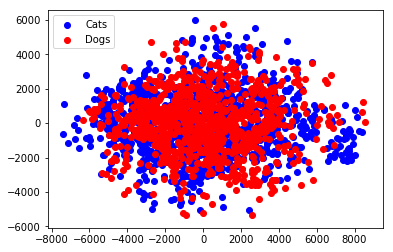

In [5]:
print("Computing Isomap embedding")
C_iso = manifold.Isomap(n_neighbors, n_components).fit_transform(cats)
D_iso = manifold.Isomap(n_neighbors, n_components).fit_transform(dogs)
print("Done.")

plotting(C_iso, D_iso)

Now let's do **Spectral embedding**. There are different method for this routine. However this 'standard' is the one giving less problems!

Computing Spectral embedding
Done.


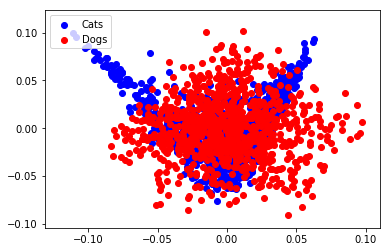

In [31]:
print("Computing Spectral embedding")
C_emb = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', 
                                        method = 'standard').fit_transform(cats)
D_emb = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', 
                                        method= 'standard').fit_transform(dogs)
print("Done.")

plotting(C_emb, D_emb)

Finally **t-SNE**

Computing t-SNE
Done.


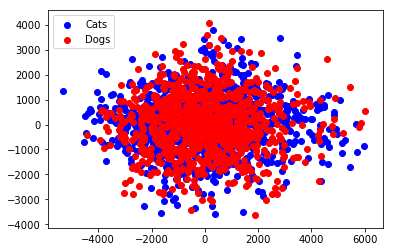

In [33]:
print("Computing t-SNE")
C_tSNE = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(cats)
D_tSNE = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(dogs)
print("Done.")

plotting(C_tSNE, D_tSNE)